# Wild Animal Recognition

## Team11

<font size=4> Team Member：Wenwen Ni, Xuejiao Dong, Yanda Yuan, Qifan Wang

# 1、Back Ground

<font size=4>Animal detection in the wildlife has been an area of great interest among many fields. Animal detection and classification can help prevent animal-vehicle accidents, trace animal facility, prevent theft, and ensure the security of animals. So our team decided to study wild animal images dataset and use different methods to help us classify animal images, hoping to help better protect wild animals.

<font size=4> Our project have two main goals:

<font size=4> ( 1 )  Automatically identify the category of wild animals based on the images given and adjust hyperparameters to improve the accuracy of identification.

<font size=4>( 2 ) Compare the performance of the CNN model and MLP model in classification so that we can know which one is more suitable to detect animal images.

# 2、Data Preprocessing

### Import important package

In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()  

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense
import seaborn as sns
import numpy as np
import pandas as pd

from keras import backend as K

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
#optional, use GPU instead
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Read Image Data

In [4]:
import cv2

In [3]:
Data_dir = 'data/animal_dataset_intermediate/animal'

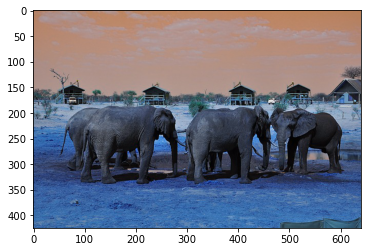

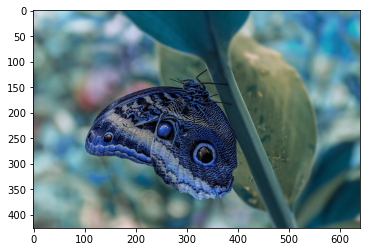

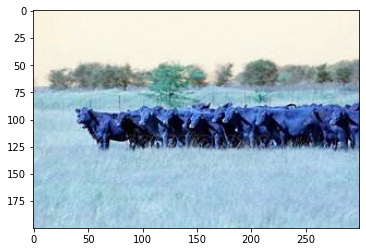

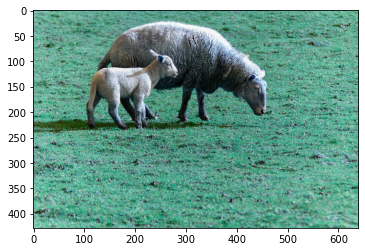

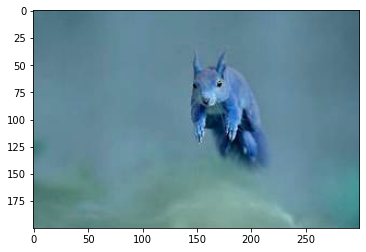

In [6]:
Classes = ["elefante","farfalla","mucca","pecora","scoiattolo"]

for classes in  Classes:
    path = os.path.join(Data_dir, classes)
    
    #Read the image data for each folder
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    

In [7]:
img_array

array([[[ 88, 127, 142],
        [ 85, 124, 139],
        [ 83, 122, 137],
        ...,
        [ 75, 111, 127],
        [ 76, 112, 128],
        [ 77, 113, 129]],

       [[ 86, 125, 140],
        [ 83, 122, 137],
        [ 81, 120, 135],
        ...,
        [ 72, 108, 124],
        [ 74, 110, 126],
        [ 75, 111, 127]],

       [[ 84, 123, 138],
        [ 82, 121, 136],
        [ 79, 118, 133],
        ...,
        [ 70, 106, 122],
        [ 71, 107, 123],
        [ 72, 108, 124]],

       ...,

       [[ 96, 136, 131],
        [ 94, 134, 129],
        [ 91, 131, 126],
        ...,
        [ 51, 117, 122],
        [ 49, 117, 122],
        [ 49, 117, 122]],

       [[ 98, 138, 133],
        [ 95, 135, 130],
        [ 93, 133, 128],
        ...,
        [ 53, 119, 124],
        [ 53, 119, 124],
        [ 53, 119, 124]],

       [[ 99, 139, 134],
        [ 97, 137, 132],
        [ 95, 135, 130],
        ...,
        [ 57, 121, 126],
        [ 57, 121, 126],
        [ 57, 121, 126]]

### Create animal_all_data 

<font size=3> animal_all_data consists of img_array and class_num

In [8]:
img_W=100
img_H=100

In [9]:
animal_all_data=[]

In [10]:
def create_animal_all_data():
    for animal_class in  Classes:
        path = os.path.join(Data_dir, animal_class)
        
        #Take the index of Classes as class_num, and its values range from 0 to 4
        class_num = Classes.index(animal_class)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                new_array=cv2.resize(img_array,(img_W,img_H))
                #combining imgage array and class_num as animal_all_data
                animal_all_data.append([new_array,class_num])
            except Exception as Warnings_Occur :
                pass

In [11]:
create_animal_all_data()

In [12]:
print(len(animal_all_data))

8196


<font size=3>Sample：
    
<font size=3> Column 1 is class_num that represents image data categories. 
    
<font size=3> 0:elefante     1:farfalla      2:mucca      3:pecora     4:scoiattolo

In [13]:
import random

random.shuffle(animal_all_data)

In [14]:
for animal_sample in animal_all_data[:10]:
    #animal_sample[1]:class_num, animal_sample[0]:image array
    print(animal_sample[1])

0
3
0
3
3
3
4
0
3
1


# 3、MLP with Keras

### Split X_train y_train X_test y_test

<font size=3> Split animal_all_data into train_data and test_data

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
train_data,test_data= train_test_split(animal_all_data, test_size=0.10, random_state=0)

<font size=3>split train_data into X_train and y_train

In [17]:
X_train = []
y_train = []
X_test = []
y_test = []

In [18]:
for img_features,class_num in train_data:
    
    #train_data[0] as X_train, train_data[1] as y_train
    X_train.append(img_features)
    y_train.append(class_num)

In [19]:
X_train = np.array(X_train).reshape(-1,img_W,img_H,3)
y_train = np.array(y_train)

In [20]:
X_train.shape

(7376, 100, 100, 3)

In [21]:
y_train.shape

(7376,)

<font size=3>split test_data into X_test and y_test

In [22]:
for img_features,class_num in test_data:
    #test_data[0] as X_test, test_data[1] as y_test
    X_test.append(img_features)
    y_test.append(class_num)

In [23]:
X_test = np.array(X_test).reshape(-1,img_W,img_H,3)
y_test = np.array(y_test)

In [24]:
X_test.shape

(820, 100, 100, 3)

In [25]:
y_test.shape

(820,)

split X_train,y_train into X_train, val_x, y_train and val_y

In [26]:
X_train, val_x, y_train, val_y = train_test_split(X_train, y_train, test_size=0.10, random_state=415)

In [27]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)
print('val_x: ',val_x.shape)
print('val_y: ',val_y.shape)

X_train:  (6638, 100, 100, 3)
y_train:  (6638,)
X_test:  (820, 100, 100, 3)
y_test:  (820,)
val_x:  (738, 100, 100, 3)
val_y:  (738,)


### Creating model_mlp

In [62]:
model_mlp=keras.models.Sequential([
   keras.layers.Flatten(input_shape = (100,100,3)),
   keras.layers.Dense(300,activation='relu'),
   keras.layers.Dense(100,activation='relu'),
   keras.layers.Dense(5,activation='softmax')
])

In [63]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               9000300   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 9,030,905
Trainable params: 9,030,905
Non-trainable params: 0
_________________________________________________________________


### Compile the model_mlp

In [64]:
model_mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Training and evaluating the model_mlp

<font size=3>Training model_mlp

In [65]:
model_mlp_history = model_mlp.fit(X_train,y_train,epochs=15,validation_data=(val_x, val_y))

Epoch 1/15
208/208 [==============================] - 1s 3ms/step - loss: 1495.8419 - accuracy: 0.2418 - val_loss: 385.6055 - val_accuracy: 0.3252
Epoch 2/15
208/208 [==============================] - 1s 3ms/step - loss: 253.9210 - accuracy: 0.3374 - val_loss: 184.5520 - val_accuracy: 0.3388
Epoch 3/15
208/208 [==============================] - 1s 3ms/step - loss: 136.1753 - accuracy: 0.3571 - val_loss: 55.2824 - val_accuracy: 0.3482
Epoch 4/15
208/208 [==============================] - 1s 3ms/step - loss: 60.9368 - accuracy: 0.3725 - val_loss: 75.4172 - val_accuracy: 0.2954
Epoch 5/15
208/208 [==============================] - 1s 3ms/step - loss: 63.6514 - accuracy: 0.3841 - val_loss: 49.3356 - val_accuracy: 0.2805
Epoch 6/15
208/208 [==============================] - 1s 3ms/step - loss: 39.2689 - accuracy: 0.3839 - val_loss: 41.7188 - val_accuracy: 0.3957
Epoch 7/15
208/208 [==============================] - 1s 3ms/step - loss: 22.2163 - accuracy: 0.4274 - val_loss: 18.1911 - val_acc

<font size=3> Evaluting the model_mlp

In [68]:
mlp_scores =model_mlp.evaluate(X_test,y_test)
print ("Accuracy: %.2f%%" %(mlp_scores[1]*100))
print ("\nThe result of Accuracy is about %.2f%%, which is is very low. \nSo the MLP method is not very suitable for classifing or predicting our image dataset " %(mlp_scores[1]*100))

26/26 [==============================] - 0s 1ms/step - loss: 2.9743 - accuracy: 0.3732
Accuracy: 37.32%

The result of Accuracy is about 37.32%, which is is very low. 
So the MLP method is not very suitable for classifing or predicting our image dataset 


### Visulization

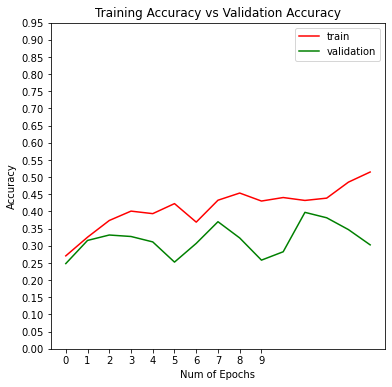

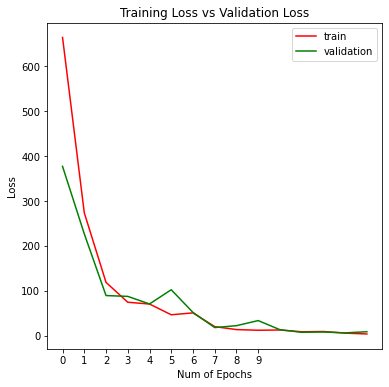

In [111]:
# plot
plt.figure(0)
plt.plot(model_mlp_history.history['accuracy'],'r')
plt.plot(model_mlp_history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.yticks(np.arange(0, 1.0, 0.05))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_mlp_history.history['loss'],'r')
plt.plot(model_mlp_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

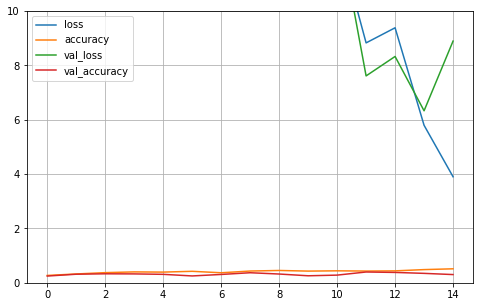

In [112]:
pd.DataFrame(model_mlp_history.history).plot(figsize=(8,5))
plt.grid(True)
#set vertical range from 0 to 10
plt.gca().set_ylim(0,10)
plt.show()

<font size=3>When the value of loss decrease, the value of accuracy remains basically the same, and the value is very low.
As can be seen from this chart, the MLP method is not suitable for our image data set

### Make prediction(choose 10 pictures to predict)

<font size=3> the value of labels is from 0 to 4, which represent "elefante","farfalla","mucca","pecora","scoiattolo"

In [73]:
X_mlp_predict=X_test[:10]

In [74]:
X_mlp_predict2=X_mlp_predict.reshape(-1,100,100,3)
X_mlp_predict2

array([[[[ 45,  50,  21],
         [ 50,  50,  25],
         [ 54,  54,  28],
         ...,
         [  8,  46,  17],
         [ 12,  45,  18],
         [ 17,  47,  18]],

        [[ 45,  50,  21],
         [ 50,  53,  27],
         [ 59,  59,  34],
         ...,
         [  6,  46,  16],
         [ 10,  46,  16],
         [ 16,  47,  18]],

        [[ 46,  50,  21],
         [ 53,  54,  28],
         [ 61,  61,  35],
         ...,
         [  6,  46,  15],
         [  8,  47,  15],
         [ 13,  50,  18]],

        ...,

        [[ 30,  32,  10],
         [ 30,  33,   8],
         [ 30,  34,  10],
         ...,
         [ 41, 124,  40],
         [ 41, 123,  40],
         [ 45, 125,  42]],

        [[ 30,  32,  10],
         [ 31,  35,  10],
         [ 30,  36,  10],
         ...,
         [ 42, 125,  40],
         [ 41, 124,  39],
         [ 43, 123,  40]],

        [[ 30,  34,   9],
         [ 30,  36,  11],
         [ 30,  38,  11],
         ...,
         [ 44, 126,  43],
        

In [75]:
y_mlp_predict=model_mlp.predict_classes(X_mlp_predict2)
y_mlp_predict

array([1, 0, 0, 0, 0, 3, 0, 3, 3, 0], dtype=int64)

In [76]:
y_mlp_real=y_test[:10]
y_mlp_real

array([1, 3, 2, 2, 2, 2, 0, 1, 4, 4])

<font size=3>From the prediction of the selected 10 image sample data, it can also be seen that most of the prediction results and actual values are not the same, so the MLP method is not suitable for our image dataset

### Plot predict result

In [77]:
def plot_result(X,y,index):
    plt.figure(figsize=(15,5))
    plt.imshow(X[index])
    plt.xlabel(Classes[y[index]])

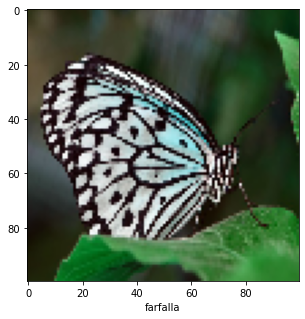

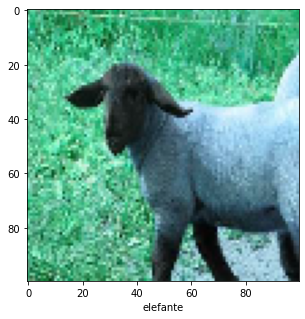

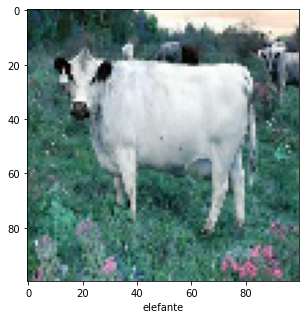

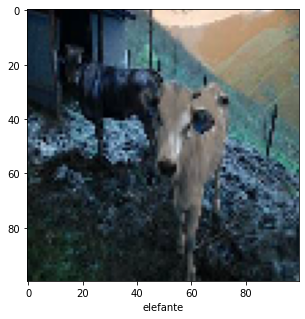

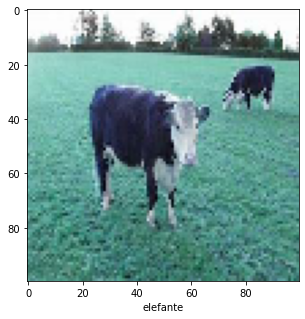

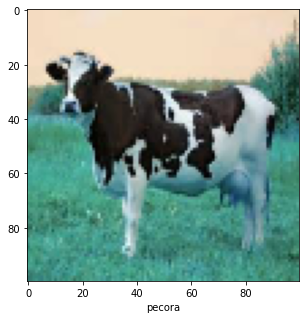

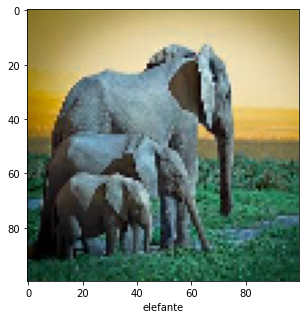

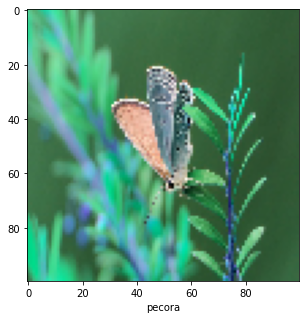

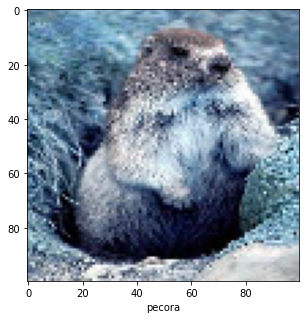

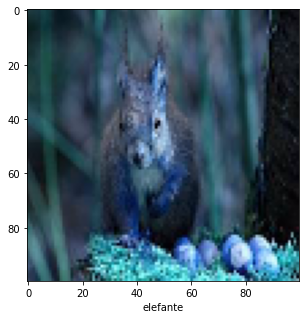

In [78]:
for i in range(0,10):
    plot_result(X_mlp_predict,y_mlp_predict,i)

# 4、CNN

### Creating CNN model

In [69]:
model_cnn = keras.models.Sequential([
    # convolutional layers
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [70]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)        

### Compile model_cnn

In [71]:
model_cnn.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training and evaluating the model_cnn

<font size=3> Training the model_cnn

In [72]:
model_cnn_history = model_cnn.fit(X_train,y_train,epochs=10,validation_data=(val_x, val_y))

Epoch 1/10
208/208 [==============================] - 2s 7ms/step - loss: 3.5220 - accuracy: 0.3618 - val_loss: 1.0477 - val_accuracy: 0.5556
Epoch 2/10
208/208 [==============================] - 1s 6ms/step - loss: 0.9988 - accuracy: 0.6080 - val_loss: 0.9025 - val_accuracy: 0.6721
Epoch 3/10
208/208 [==============================] - 1s 6ms/step - loss: 0.8182 - accuracy: 0.6853 - val_loss: 0.8335 - val_accuracy: 0.7087
Epoch 4/10
208/208 [==============================] - 1s 6ms/step - loss: 0.7065 - accuracy: 0.7348 - val_loss: 0.8863 - val_accuracy: 0.6775
Epoch 5/10
208/208 [==============================] - 1s 6ms/step - loss: 0.6113 - accuracy: 0.7674 - val_loss: 0.8623 - val_accuracy: 0.6965
Epoch 6/10
208/208 [==============================] - 1s 6ms/step - loss: 0.5088 - accuracy: 0.8132 - val_loss: 0.7412 - val_accuracy: 0.7371
Epoch 7/10
208/208 [==============================] - 1s 6ms/step - loss: 0.3883 - accuracy: 0.8571 - val_loss: 0.9817 - val_accuracy: 0.7141
Epoch 

<font size=3>Evaluating the medel_cnn

In [73]:
cnn_scores =model_cnn.evaluate(X_test,y_test)
print ("Accuracy: %.2f%%" %(cnn_scores[1]*100))
print ("\nThe result of Accuracy is about %.2f%%, which is more bigger than the result of MLP. \nSo the CNN method is very suitable for classifing or predicting our image dataset " %(cnn_scores[1]*100))

26/26 [==============================] - 0s 4ms/step - loss: 1.1654 - accuracy: 0.7098
Accuracy: 70.98%

The result of Accuracy is about 70.98%, which is more bigger than the result of MLP. 
So the CNN method is very suitable for classifing or predicting our image dataset 


### Visulization

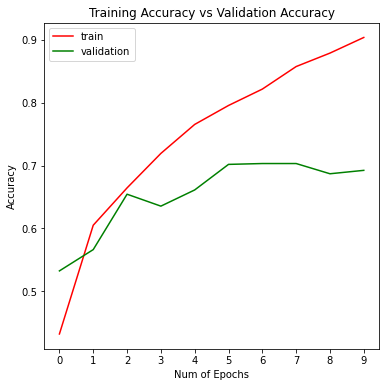

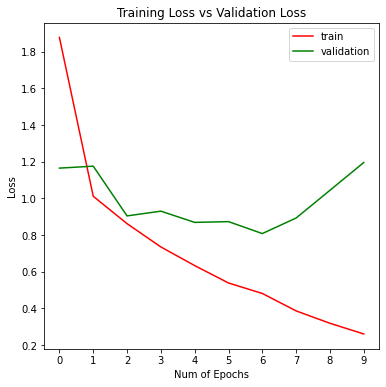

In [125]:
# plot
plt.figure(0)
plt.plot(model_cnn_history.history['accuracy'],'r')
plt.plot(model_cnn_history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_cnn_history.history['loss'],'r')
plt.plot(model_cnn_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

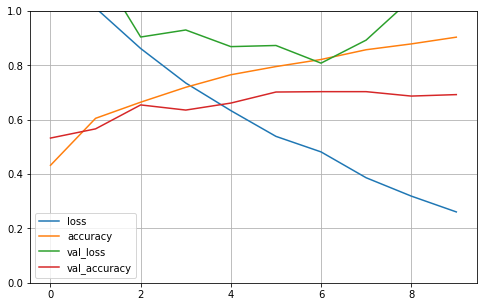

In [126]:
pd.DataFrame(model_cnn_history.history).plot(figsize=(8,5))
plt.grid(True)
#set vertical range from 0 to 1
plt.gca().set_ylim(0,1)
plt.show()

<font size=3> When the value of loss decrease, the value of accuracy increase, and the value is very high. As can be seen from this chart, the cnn method is very suitable for our image dataset

### Make prediction(choose 10 pictures to predict)

In [97]:
X_cnn_predict=X_test[:10]
X_cnn_predict2=X_cnn_predict.reshape(-1,100,100,3)

In [103]:
np.argmax(model_cnn.predict(X_cnn_predict2), axis=-1)
y_cnn_predict

array([1, 0, 2, 2, 2, 2, 0, 1, 4, 0], dtype=int64)

In [100]:
y_cnn_real=y_test[:10]
y_cnn_real

array([1, 3, 2, 2, 2, 2, 0, 1, 4, 4])

<font size=3> From the prediction of the selected 10 image sample data, it can also be seen that most of the prediction results and actual values are the same, so the CNN method is very suitable for our image dataset

### Plot predict result

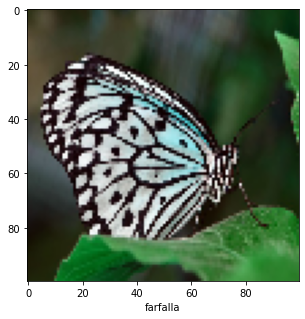

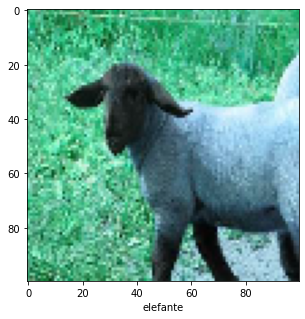

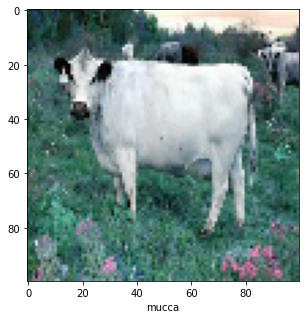

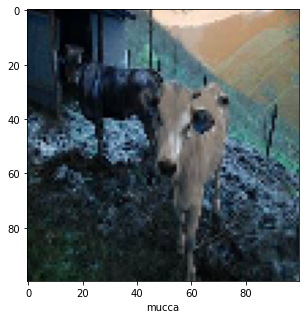

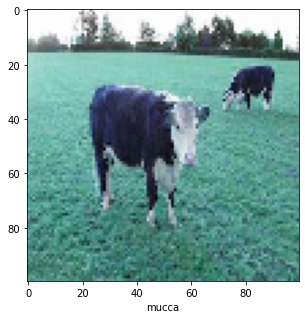

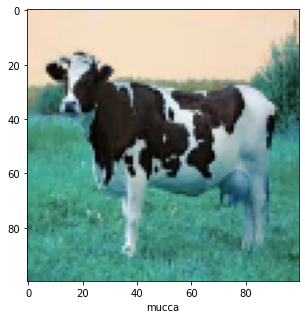

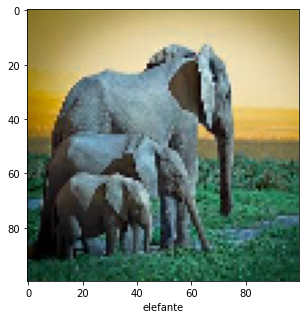

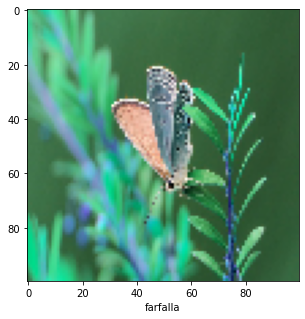

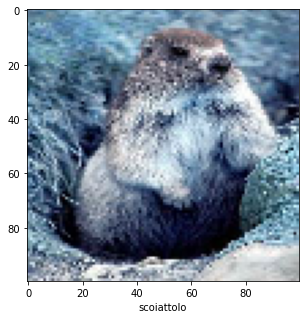

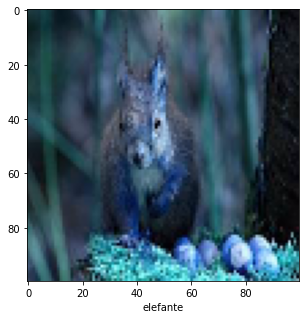

In [104]:
for i in range(0,10):
    plot_result(X_cnn_predict,y_cnn_predict,i)

# Talos

In [28]:
import talos

In [29]:
# add input parameters to the function
def TalosCnnModel(train_x, train_y, val_x, val_y, params):

    TCmodel = keras.Sequential()
    TCmodel.add(keras.layers.Conv2D(params['first_Conv2D_neuron'], params['Conv2DSize'], input_shape=(100,100,3)))
    TCmodel.add(keras.layers.Activation(params['activation']))
    TCmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


    TCmodel.add(keras.layers.Conv2D(params['second_Conv2D_neuron'], params['Conv2DSize']))
    TCmodel.add(keras.layers.Activation(params['activation']))
    TCmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


    TCmodel.add(keras.layers.Conv2D(params['third_Conv2D_neuron'], params['Conv2DSize']))
    TCmodel.add(keras.layers.Activation(params['activation']))
    TCmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    
    TCmodel.add(keras.layers.Conv2D(params['fourth_Conv2D_neuron'], params['Conv2DSize']))
    TCmodel.add(keras.layers.Activation(params['activation']))
    TCmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


    TCmodel.add(keras.layers.Flatten())
    TCmodel.add(keras.layers.Dense(params['first_neuron'],params['activation']))
    TCmodel.add(keras.layers.Dense(params['second_neuron'],params['activation']))
    TCmodel.add(keras.layers.Dense(params['third_neuron'],params['activation']))
    TCmodel.add(keras.layers.Dense(5, params['last_activation']))
    
    
    TCmodel.compile(optimizer=params['optimizer'],
              loss=params['losses'],
              metrics=['accuracy'])
    # make sure history object is returned by model.fit()
    out = TCmodel.fit(train_x, 
                    train_y,
                    epochs=params['epochs'],
                    validation_data=(val_x, val_y),
                    batch_size=params['batch_size'],
                    verbose=0)

    # modify the output model
    return out, TCmodel

In [30]:
#adjust neuron numbers
p = { 
     'first_Conv2D_neuron':[32],
     'second_Conv2D_neuron':[64,128],
     'third_Conv2D_neuron':[128,256],
     'fourth_Conv2D_neuron':[256,1024],
     'batch_size': [32],
     'first_neuron':[256,512],
     'second_neuron':[128,256],
     'third_neuron':[32,64],
     'batch_size': [128],
     'epochs': [10],
     'Conv2DSize':[(3,3)],#,(5,5)
     'dropout': [0.2],
     'optimizer': ['Adam'],
     'lr': [0.1],
     'losses': ['sparse_categorical_crossentropy'],
     'activation':['relu'],
     'last_activation': ['softmax'],
     'conv_dropout': [0.25]}

Above we have many hyperparameters availble to adjust, however, due to limitation of the system, we can only adjust a small amount a time and won't be able to keep all adjustment record here, so we just kept 2 as an example here.

In [31]:
if os.path.exists("results_cnn.csv"):
    os.remove("results_cnn.csv")
else:
    print("The file does not exist, start:")
t = talos.Scan(X_train, y_train, params=p, model=TalosCnnModel, experiment_name='#CNN')
t.data.to_csv('results_cnn.csv')

  0%|                                                   | 0/64 [00:00<?, ?it/s]

The file does not exist


100%|██████████████████████████████████████████| 64/64 [08:48<00:00,  8.26s/it]


In [73]:
e_cnn = talos.Evaluate(t)
e_cnn.evaluate(X_test, y_test,'multi_class','accuracy')

[0.6305246050111502,
 0.6239971439129646,
 0.5653695184201243,
 0.5776390192294001,
 0.6300291199410918]

In [41]:
df = pd.read_csv('results_cnn.csv')
df['nodes'] = df.first_neuron + df.second_neuron + df.third_neuron + df.first_Conv2D_neuron + df.second_Conv2D_neuron +df.third_Conv2D_neuron + df.fourth_Conv2D_neuron
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_accuracy'] = df.val_accuracy 
print(df.sort_values('val_accuracy', ascending=False).head())

    Unnamed: 0            start              end   duration  round_epochs  \
22          22  04/20/21-175844  04/20/21-175852   8.359081            10   
15          15  04/20/21-175748  04/20/21-175757   8.472693            10   
30          30  04/20/21-175957  04/20/21-180007  10.090345            10   
39          39  04/20/21-180106  04/20/21-180114   7.284092            10   
7            7  04/20/21-175644  04/20/21-175651   7.214712            10   

        loss  accuracy  val_loss  val_accuracy Conv2DSize  ...  \
22  0.263911  0.902066  0.871400      0.746486     (3, 3)  ...   
15  0.412831  0.845458  0.736541      0.741968     (3, 3)  ...   
30  0.400817  0.859449  0.812115      0.741968     (3, 3)  ...   
39  0.436666  0.838356  0.794231      0.741466     (3, 3)  ...   
7   0.303238  0.892165  0.841339      0.739960     (3, 3)  ...   

   last_activation                           losses   lr  optimizer  \
22         softmax  sparse_categorical_crossentropy  0.1       Adam  

Text(0.5, 1.0, 'accuracy impact by number of Neurons')

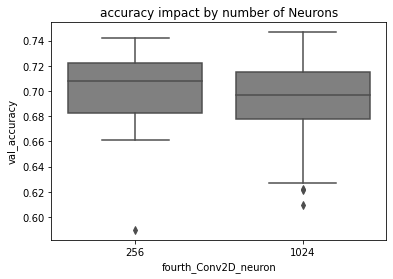

In [48]:
import seaborn as sns
metric = 'fourth_Conv2D_neuron'
ax = sns.boxplot(x=metric, y='val_accuracy', data=df.reset_index(),color='grey')
ax.set_title('accuracy impact by number of Neurons')
# Increasing neurons have limited impact

In [50]:
#adjust batch size
p = { 
     'first_Conv2D_neuron':[32],
     'second_Conv2D_neuron':[64],
     'third_Conv2D_neuron':[256],
     'fourth_Conv2D_neuron':[1024],
     'batch_size': [32],
     'first_neuron':[256],
     'second_neuron':[256],
     'third_neuron':[32],
     'batch_size': [32,64,128],
     'epochs': [10],
     'Conv2DSize':[(3,3)],#,(5,5)
     'dropout': [0.2],
     'optimizer': ['Adam'],
     'lr': [0.1],
     'losses': ['sparse_categorical_crossentropy'],
     'activation':['relu'],
     'last_activation': ['softmax'],
     'conv_dropout': [0.25]}

In [51]:
if os.path.exists("results_cnn_batch.csv"):
    os.remove("results_cnn_batch.csv")
else:
    print("The file does not exist, start:")
t = talos.Scan(X_train, y_train, params=p, model=TalosCnnModel, experiment_name='#CNN_batch')
t.data.to_csv('results_cnn_batch.csv')

  0%|                                                    | 0/3 [00:00<?, ?it/s]

The file does not exist, start:


100%|████████████████████████████████████████████| 3/3 [00:30<00:00, 10.28s/it]


In [52]:
df_batch = pd.read_csv('results_cnn_batch.csv')
df_batch['val_accuracy'] = df_batch.val_accuracy 
print(df_batch.sort_values('val_accuracy', ascending=False).head())

   Unnamed: 0            start              end   duration  round_epochs  \
2           2  04/20/21-182547  04/20/21-182555   8.298530            10   
1           1  04/20/21-182537  04/20/21-182547   9.668619            10   
0           0  04/20/21-182524  04/20/21-182537  12.438290            10   

       loss  accuracy  val_loss  val_accuracy Conv2DSize  ... first_neuron  \
2  0.288451  0.900990  0.936700      0.725904     (3, 3)  ...          256   
1  0.179250  0.936720  1.200852      0.702811     (3, 3)  ...          256   
0  0.383174  0.863108  1.038137      0.689257     (3, 3)  ...          256   

   fourth_Conv2D_neuron  last_activation                           losses  \
2                  1024          softmax  sparse_categorical_crossentropy   
1                  1024          softmax  sparse_categorical_crossentropy   
0                  1024          softmax  sparse_categorical_crossentropy   

    lr  optimizer  second_Conv2D_neuron  second_neuron third_Conv2D_neuro

Text(0.5, 1.0, 'accuracy impact by number of batch_size')

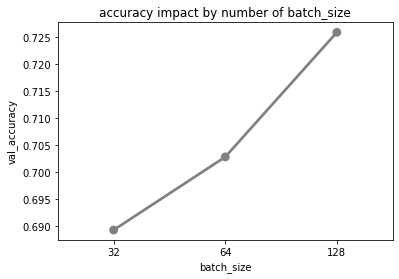

In [59]:
metric = 'batch_size'
ax = sns.pointplot(x=metric, y='val_accuracy', data=df_batch.reset_index(),color='grey')
ax.set_title('accuracy impact by number of batch_size')
# Increasing batch size have positive impact

# 5、Conclusion

### Accuracy:  MLP  vs  CNN

In [74]:
print ("Accuracy: %.2f%%" %(mlp_scores[1]*100))

Accuracy: 37.32%


In [75]:
print ("Accuracy: %.2f%%" %(cnn_scores[1]*100))

Accuracy: 70.98%


### Predict result:MLP vs CNN

In [107]:
y_cnn_real

array([1, 3, 2, 2, 2, 2, 0, 1, 4, 4])

In [108]:
y_cnn_predict

array([1, 0, 2, 2, 2, 2, 0, 1, 4, 0], dtype=int64)

In [109]:
y_mlp_predict

array([1, 0, 0, 0, 0, 3, 0, 3, 3, 0], dtype=int64)

### Loss and Validation accuracy result:MLP vs CNN

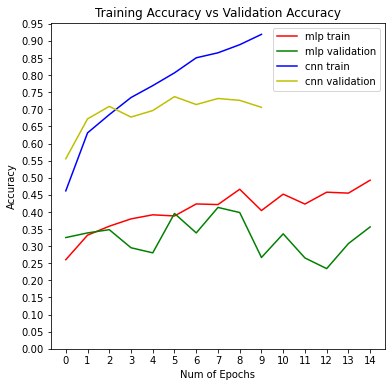

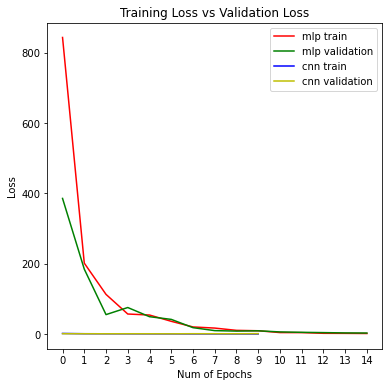

In [82]:
# plot
plt.figure(0)
plt.plot(model_mlp_history.history['accuracy'],'r')
plt.plot(model_mlp_history.history['val_accuracy'],'g')
plt.plot(model_cnn_history.history['accuracy'],'b')
plt.plot(model_cnn_history.history['val_accuracy'],'y')
plt.xticks(np.arange(0, 15, 1.0))
plt.yticks(np.arange(0, 1.0, 0.05))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['mlp train','mlp validation', 'cnn train','cnn validation'])
 
plt.figure(2)
plt.plot(model_mlp_history.history['loss'],'r')
plt.plot(model_mlp_history.history['val_loss'],'g')
plt.plot(model_cnn_history.history['loss'],'b')
plt.plot(model_cnn_history.history['val_loss'],'y')
plt.xticks(np.arange(0, 15, 1.0))
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['mlp train','mlp validation', 'cnn train','cnn validation'])

plt.show()

### Conclusion

<font size=3> As we can see, CNN performs better than MLP, both in the accuracy of the results and in predicting the sample data.So,the CNN method is more applicable to the classification and prediction of images. Also, size of image when loading can influence the accuracy. For example, we are using 100x100 in this notebook however if we use 200x200 instead, the overall accuracy will increase 5-10%.

# 6、Citation

CV2 Read Image Data：https://stackoverflow.com/questions/65037659/how-to-import-image-dataset-from-folder-with-tensorflowio

Aurélien Géron, (2017) , *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, O'Reilly Media, Inc